# Mathematics of the Bohr model

Bohr knew that his model of the hydrogen atom had to reproduce the Rydberg equation, which predicts the wavelengths of photons that can be emitted or absorbed by the hydrogen atom:

### $\frac{1}{\lambda} = R_H \left( \frac{1}{n^2} - \frac{1}{k^2} \right)$             for integers $n \geq 1$ and $k > n$.

$R_H$ is the Rydberg constant for hydrogen, experimentally measured in the early 20th century to be $1.09678 \times 10^7$ m$^{-1}$. The hydrogen absorption / emission lines we can see in visible light correspond to $n = 2$, that is, the electron is one level above its ground state. An electron dropping from a higher level down to $n = 2$ emits a photon; an electron gains the energy to jump from $n = 2$ to a higher level by absorbing a photon.

The top panel of the figure below has the absorption spectrum of hydrogen on top and the emission spectrum in the middle. You get an absorption spectrum when cool gas sits on top of a hot blackbody. You get an emission spectrum from either hot gas in isolation, like a gas discharge tube, or hot gas on top of a cooler blackbody. The bottom of the figure is a schematic of the electron's transition between energy levels that produces each wavelength of light. Note, 10 Angstroms (A with a circle on top) = 1 nm.

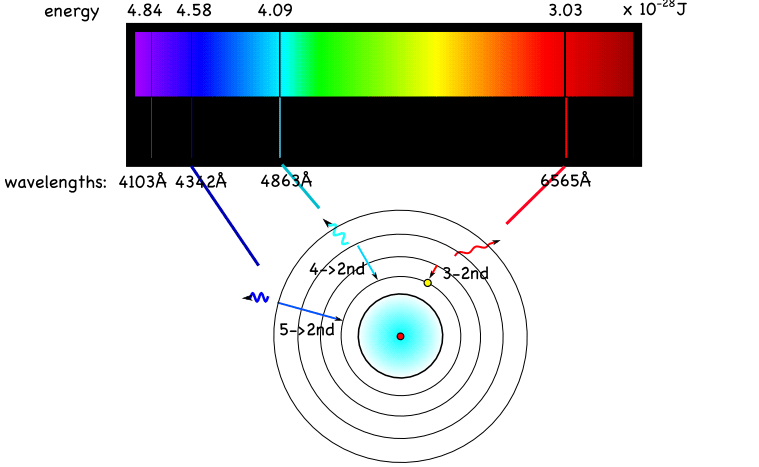

In [1]:
from PIL import Image
hyspec = Image.open("hydrogen-emission.gif")
display(hyspec)

### Starting with Bohr's assumptions, we'll calculate the following:

<ul>
    <li>Radius of the ground-state hydrogen atom, or Bohr radius</li>
    <li>Energies of the stationary states</li>
    <li>Rydberg constant for an infinite nuclear mass, $R_{\infty}$</li>
    <li>Rydberg constant for hydrogen, $R_H$, given above</li>
</ul>

Bohr followed Rutherford's planetary model by conceptualizing the stationary states as circular orbits. He also assumed that the nucleus mass $m_n$ was so much larger than the electron mass $m_e$ that it could be treated as infinite. The statement $m_n \gg m_e$ is supported by Rutherford, Geiger, and Marsden's $\alpha$ particle scattering experiments.

From assumption 4, quantization of kinetic energy, we get
### $K = \frac{1}{2} m_e v^2 = \frac{n h \nu}{2}$ ,    (1)
where $v$ is the electron's orbital speed and $\nu$ is its orbital frequency in cycles/second. We solve for $v$:
### $v = \sqrt{\frac{n h \nu}{m_e}}$ .    (2)
The electron's orbital period is $2 \pi r / v$, where $r$ is the orbital radius. The inverse of the period is the orbital frequency:
### $\nu = \frac{v}{2 \pi r}$.     (3)
Substituting (3) into (2) and solving again for $v$ gives
### $v = \frac{n h}{2 \pi r m_e} = \frac{n \hbar}{r m_e}$.     (4)
<span style="color:red">You will often see the symbol $\hbar = \frac{h}{2\pi}$.</span> 

Now let's calculate the electron orbital speed classically, using Coulomb's law. The force between the nucleus (proton) and the electron is
### $F = - \frac{e^2}{4 \pi \epsilon_0 r^2}$,     (5)
where $e$ is the elementary charge. In uniform circular motion, the electron's acceleration is $a = -v^2 / r$. Newton's 2nd law gives
### $\frac{e^2}{4 \pi \epsilon_0 r^2} = \frac{m_e v^2}{r}$
### $v = \frac{e}{\sqrt{4 \pi \epsilon_0 m_e r}}$.     (6)

We find the value of $v^2$ from equations (4) and (6) and set them equal:
### $v^2 = \frac{e^2}{4 \pi \epsilon_0 m_e r} = \frac{n^2 \hbar^2}{r^2 m_e^2}$.     (7)
Multiplying each side of (7) by $r m_e$ gives
### $\frac{e^2}{4 \pi \epsilon_0} = \frac{n^2 \hbar^2}{r m_e}$.    (8)

Now we can solve for $r$ as a function of $n$:
## <span style="color:red">$r = \frac{4 \pi \epsilon_0 \hbar^2 n^2}{e^2 m_e}$.    (9)</span>

In Equation (9), <strong>everything except $n$ is a fundamental constant!</strong> That means in order to calculate the size of the hydrogen atom - which is the radius of the electron's orbit - all we have to know is the energy level $n$.

Setting $n = 1$, we can calculate the <strong>Bohr radius</strong>, which is the size of the hydrogen atom in the ground state:

In [2]:
import numpy as np
from scipy import constants

Bohr_radius = 4 * np.pi * constants.epsilon_0 * constants.hbar**2 / \
              (constants.elementary_charge**2 * constants.electron_mass)

print('Calculated Bohr radius:', f"{Bohr_radius:.5g}")
print('scipy value of Bohr radius:', constants.physical_constants['Bohr radius'])
# Note: the last value in the tuple is the uncertainty on the Bohr radius

Calculated Bohr radius: 5.2918e-11
scipy value of Bohr radius: (5.29177210903e-11, 'm', 8e-21)


Equation (9) is often written as 
### $r = n^2 a_0$,       (10)
where $a_0$ is the Bohr radius.

In 1915, the experimentally measured smallest possible size (diameter) of the hydrogen atom was $\approx 10^{-10}$ m, or about $2 a_0$! Bohr had correctly predicted its size from his new theory.

Equations (9) and (10) mean the size of the hydrogen atom is <strong>quantized</strong>: only certain radii/diameters are possible.

### Let's find the energies of the stationary states (energy levels)

First, we find the total energy in the atom: kinetic + potential. <strong>The value should be negative because the atom is bound by the Coulomb force.</strong>
#### $E_{\rm tot} = \frac{1}{2} m_e v^2 - \frac{e^2}{4 \pi \epsilon_0 r}$.     (11)
We substitute in the value of $v$ from Equation (6) to get
#### $E_{\rm tot} = \frac{1}{2} \frac{e^2}{4 \pi \epsilon_0 r} - \frac{e^2}{4 \pi \epsilon_0 r} = -\frac{e^2}{8 \pi \epsilon_0 r}$.     (12)
Finally, since we know the possible values of $r$ from Equation (10), we can calculate the energy levels:
### $E_{\rm tot} = \frac{e^2}{8 \pi \epsilon_0 a_0 n^2}$.     (13)


### Let's plot the energy levels $n = 1 \ldots 8$:

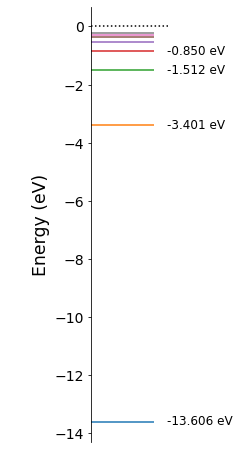

In [7]:
import matplotlib.pyplot as plt

# Calculate energy levels in eV
energy_levels = lambda n: -constants.elementary_charge**2 / \
                          (8 * np.pi * constants.epsilon_0 * Bohr_radius * n**2) / \
                          constants.physical_constants['electron volt-joule relationship'][0]

fig, ax = plt.subplots(figsize=(3,8))
for n in range(1,9): # Have to take range up to 9 to actually include 8
    lev = energy_levels(n)
    ax.scatter([0], lev, marker=1, s=4000)
    if (n <= 4):
        ax.text(0.05, lev-0.1, f"{lev:.3f}"+" eV", fontsize='large')
ax.scatter([0], [0], marker=1, s=6000, color='k', ls=':')
# ax.set_yscale("log")
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
# ax.invert_yaxis()
ax.set_ylabel('Energy (eV)', fontsize='xx-large')
ax.tick_params(axis='y', labelsize=14)

#### -13.6 eV is the measured "ionization potential" of hydrogen - the amount of energy it takes to completely remove the electron from the atom if it starts in the ground state.

### For you to do: calculate the Rydberg constant, $R_{\infty}$, assuming the nucleus is infinitely more massive than the electron.

To do this, figure out the value of $1 / \lambda$ in terms of energy levels $E_{\rm up}$ (upper) and $E_{\rm low}$ (lower) in a transition. The value of $R_H$ is a small correction to $R_{\infty}$.